In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

from math import exp, pi
from numba import jit, prange
from pycheeger import SimpleSet

In [2]:
warnings.filterwarnings("ignore")

We first define the weight function which is $$\eta(x)=\text{exp}\left(-\frac{||x||^2}{2\sigma^2}\right)$$
Recall that we are interested in polygons with a fixed number of sides that minimize $$\underset{E\subset\Omega}{\text{inf}}\frac{P(E)}{\int_{E}\eta}$$

In [3]:
std = 0.5


@jit(nopython=True, parallel=True)
def eta_aux(x, res):
    for i in prange(x.shape[0]):
        squared_norm = x[i, 0] ** 2 + x[i, 1] ** 2
        res[i] += exp(-squared_norm / (2 * std**2))


def eta(x):
    if x.ndim == 1:
        tmp = np.zeros(1)
        eta_aux(np.reshape(x, (1, 2)), tmp)
        res = tmp[0]
    else:
        res = np.zeros(x.shape[0])
        eta_aux(x, res)
    return res

# Triangles

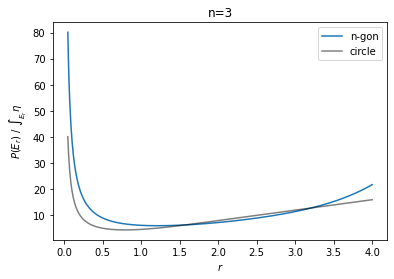

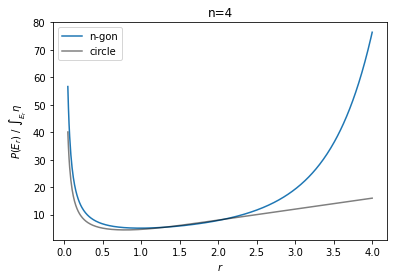

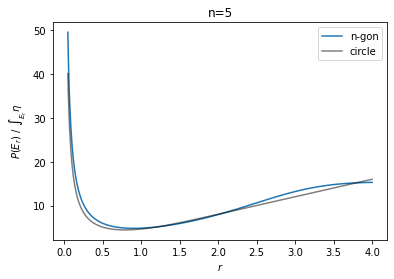

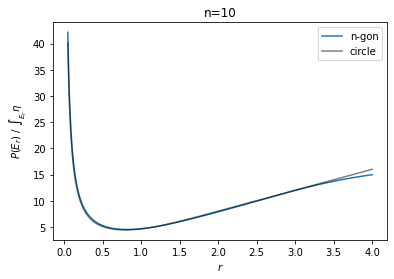

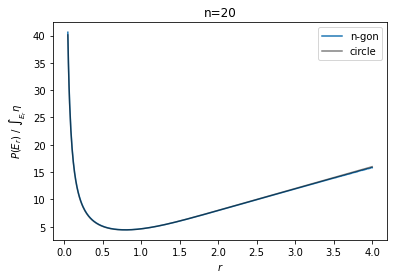

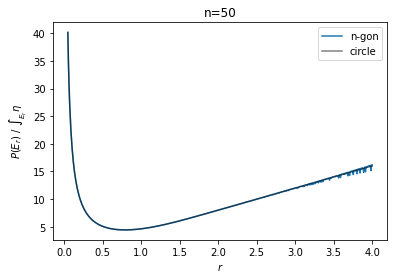

In [7]:
r_tab = np.linspace(0.05, 4, 500)
n_tab = np.array([3, 4, 5, 10, 20, 50])

for n in n_tab:
    theta_tab = np.array([2*k*pi/n for k in range(n)])
    ratio_tab = []

    for r in r_tab:
        boundary_vertices = r * np.stack([np.cos(theta_tab), np.sin(theta_tab)], axis=1)
        simple_set = SimpleSet(boundary_vertices)
        ratio_tab.append(simple_set.compute_perimeter() / simple_set.compute_weighted_area(eta))
    
    plt.title(r'n={}'.format(n))
    plt.xlabel(r'$r$')
    plt.ylabel(r'$P(E_r)~/~\int_{E_r}\eta$')
    plt.plot(r_tab, ratio_tab, label='n-gon')
    plt.plot(r_tab, r_tab / (std**2 * (1 - np.exp(-r_tab ** 2 / (2 * std**2)))), color='black', label='circle', alpha=0.5)
    plt.legend()
    plt.show()